![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [34]:
# Your code here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

**Import data**

In [2]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
onl_retail = pd.read_csv("https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv", encoding="latin1")

In [3]:
# Print out First 5 rows from dataframe
# Your code here
onl_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
onl_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


=> Description and CustomerID attributes lost a lot of data while others not, so we will look into these attributes to see what happened

### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
onl_retail[onl_retail["Description"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


In [6]:
onl_retail[onl_retail["Description"].isna()]["Country"].unique()

array(['United Kingdom'], dtype=object)

- All lost data for **Description** attribute is in **United Kingdom**

In [7]:
onl_retail[onl_retail["CustomerID"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Examine few examples of NaN values**

In [8]:
# List all NaN values
print(onl_retail.isna().sum())
print(f"There are {onl_retail.isna().sum().sum()} lost data, and it takes about {round(onl_retail.isna().sum().sum() * 100 / onl_retail.shape[0], 2)}% percent of our data.")

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
There are 136534 lost data, and it takes about 25.2% percent of our data.


=> 25% data was lost, in order to compute easily and discover data after, so we will drop these loss data

In [9]:
onl_retail.dropna(inplace=True)
onl_retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
onl_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
#convert CustomerID column from float64 to int64
onl_retail = onl_retail.astype({"CustomerID":"int"})

**Exclude negative Quantity entries**

In [12]:
onl_retail = onl_retail[onl_retail["Quantity"] >= 0]
onl_retail[onl_retail["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [13]:
onl_retail = onl_retail[onl_retail["UnitPrice"] >= 0]
onl_retail[onl_retail["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
onl_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null object
UnitPrice      397924 non-null float64
CustomerID     397924 non-null int32
Country        397924 non-null object
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [15]:
print(f"Total samples after cleaning: {onl_retail.shape[0]}")

Total samples after cleaning: 397924


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [16]:
# Your code here
highest_orders_number = onl_retail[onl_retail["Country"] == "United Kingdom"]["CustomerID"].value_counts().head(1).index.to_list()
print(f"Highest number of orders is customer with ID: {highest_orders_number}")

Highest number of orders is customer with ID: [17841]


**The customer with the highest money spent on purchases comes from Netherlands**

In [23]:
# Your code here
onl_retail["Total Price"] = onl_retail["Quantity"] * onl_retail["UnitPrice"]
onl_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047,United Kingdom,54.08


In [37]:
highest_id_spent = onl_retail.groupby('CustomerID')['Total Price'].sum().sort_values(ascending=False).head(1)
highest_id_spent

CustomerID
14646    280206.02
Name: Total Price, dtype: float64

=> The highest person ID: 14646, spent most of money which about 280206$

**On which year had the highest sales?**

In [62]:
# Your code here

# date = onl_retail["InvoiceDate"].unique()
# for d in date:
#     print(d)
#mm/dd/yy

#Convert to datetime type
onl_retail["DateFormat"] = pd.to_datetime(onl_retail['InvoiceDate'])
onl_retail["Year"] = pd.DatetimeIndex(onl_retail['DateFormat']).year  

In [64]:
onl_retail.groupby("Year")["Total Price"].sum().sort_values(ascending=False)

Year
2011    8.338694e+06
2010    5.727139e+05
Name: Total Price, dtype: float64

=> 2011s is the highest sales.

**How many orders (per hour)?**

In [78]:
onl_retail["Hour"] = pd.DatetimeIndex(onl_retail['DateFormat']).hour
onl_retail.Hour.value_counts(ascending=True)

6         1
7       379
20      802
18     2929
19     3322
8      8691
17    13072
9     21945
16    24093
10    37999
15    45372
11    49092
14    54127
13    64031
12    72069
Name: Hour, dtype: int64

=> From Hour column we can see that orders at 12pm take the most

**Make a plot about number of orders per hour**

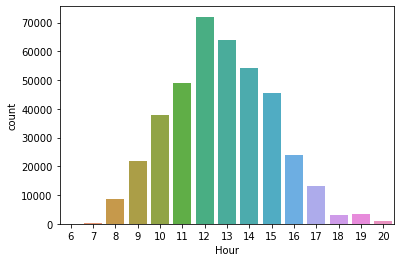

In [80]:
sns.countplot(x="Hour", data=onl_retail)

**How many orders (per month)?**

In [81]:
onl_retail["Month"] = pd.DatetimeIndex(onl_retail['DateFormat']).month
onl_retail.Month.value_counts(ascending=True)

2     19928
1     21232
4     22644
7     26827
8     27013
3     27177
6     27185
5     28322
9     40030
12    43464
10    49557
11    64545
Name: Month, dtype: int64

**Make a plot about number of orders per month**

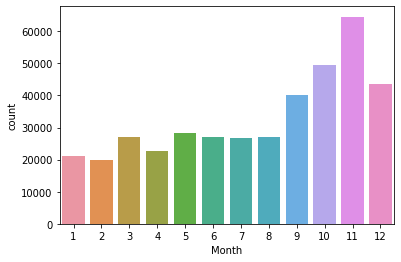

In [84]:
sns.countplot(x="Month", data=onl_retail)

=> November(11th) rank 1st with the most of orders, take about more than 65.000 orders every month.

**Top 10 items most sales**

In [87]:
onl_retail["Description"].value_counts(ascending=False).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

- White hanging heart T-Light holder is the hottest item for sale, the 2nd item is Regency cakestand 3 tier, 3rd item is Jumbo bag red retrospot

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [114]:
# Your code here
query = onl_retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False)[1:11]
query
# What can you tell about this?

Country
Netherlands    200937
EIRE           140525
Germany        119263
France         111472
Australia       84209
Sweden          36083
Switzerland     30083
Spain           27951
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64

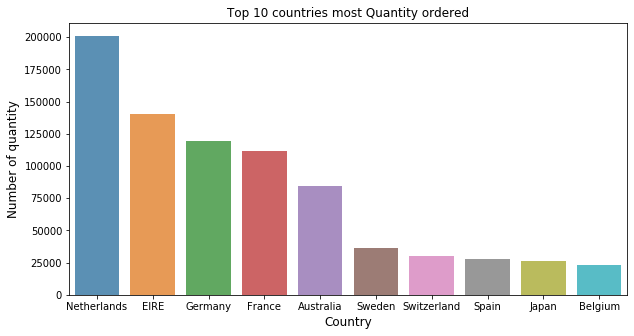

In [118]:
city_count  = onl_retail.groupby("Country")["Quantity"].sum().sort_values(ascending=False)[1:11]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 10 countries most Quantity ordered')
plt.ylabel('Number of quantity', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

=> Except UK, Netherlands is rank 1st quantity ordered, IreLand rank at 2nd, and Germany rank at 3rd. Most of top 10 country here come from West Europe. Because EU is the most suitable areas in all over the world, and the economy of EU deponds on import items, equiments from many countries, especially developing countries. So EU have a large amount of the quantity compare with others area.

### You are awesome!!